In [34]:
import numpy as np                   # for multi-dimensional containers
import pandas as pd       # for DataFrame
import json
import platypus as plat              # multi-objective optimisation framework
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

In [35]:
import pygmo as pg

In [36]:
json_file = "range.json"
j = json.load(open(json_file))

In [37]:
df = pd.json_normalize(j["data"])
df

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-d-score,gen0-norm-d-score,gen0-sparsity,...,gen4-time,gen5-front,gen5-norm-front,gen5-d-score,gen5-norm-d-score,gen5-sparsity,gen5-winner,gen5-winner-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,range,weighted_conscious,"[[50, 50.414, 564, 126, 175.5], [50, 50.414, 5...","[[0, 0, 0.922892, 1, 0], [0, 0, 0.922892, 1, 0...","[1.36078, 1.85242, 1.0067, 1.36078]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,211,"[[50, 52.07, 501, 75, 177.5], [50, 52.07, 501,...","[[0, 5.22765e-16, 0.738155, 0, 0], [0, 5.22765...","[1.36078, 1.85242, 1.0067, 1.36078]","[0.738155, 1, 0.769835, 1.02877, 0.769835, 1.5...",7920.670,"[50, 52.07, 501, 75, 177.5]",0.738155,8.596742e-322,208
1,dao-map/ost004d.map,3111,3309,range,weighted_conscious,"[[54, 54.828, 590, 140.5, 242], [54, 54.828, 5...","[[0, 0, 1, 0.868613, 0.764706], [0, 0, 1, 0.86...","[1.52947, 1.9492, 1.15171, 1.40308]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,294,"[[54, 66.42, 247, 81, 228], [54, 66.42, 247, 8...","[[0, 0.631579, 0.0340136, 0, 0.368421], [0, 0....","[1.52947, 1.9492, 1.15171, 1.40308]","[0.731972, 0.716844, 0.712028, 1.00452, 1.4142...",11872.100,"[54, 66.42, 247, 81, 228]",0.731972,2.198592e-321,290
2,dao-map/ost004d.map,3366,4402,range,weighted_conscious,"[[23, 30.038, 243, 60, 114], [23, 30.038, 243,...","[[0, 0, 1, 1, 0.040404], [0, 0, 1, 1, 0.040404...","[1.41479, 1.89335, 0.987101, 1.3775]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,142,"[[23, 30.038, 242, 34.5, 112], [23, 30.038, 24...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0.333333, ...","[1.41479, 1.89335, 0.987101, 1.3775]","[1, 0.737577, 1.04608, 1.10848, 1.22661, 1.741...",802.459,"[23, 30.038, 242, 34.5, 112]",1.000000,2.272702e-321,141
3,dao-map/ost004d.map,4151,4286,range,weighted_conscious,"[[28, 32.968, 324, 59, 133], [28, 32.968, 324,...","[[0, 0, 1, 0.507463, 0.193548], [0, 0, 1, 0.50...","[1.13797, 2, 0.858644, 0.918202]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,151,"[[28, 36.28, 206, 42, 124.5], [28, 36.28, 206,...","[[0, 0.679431, 0.351562, 0, 0.0769231], [0, 0....","[1.13797, 2, 0.858644, 0.918202]","[0.768856, 1, 1.71185, 1, 2]",2051.390,"[28, 33.796, 289, 42, 124]",1.000000,4.836903e-321,146
4,dao-map/ost004d.map,3615,497,range,weighted_conscious,"[[45, 62.802, 473, 84.5, 179], [45, 62.802, 47...","[[0, 0, 0.848276, 0.0752688, 0], [0, 0, 0.8482...","[0.851609, 2, 1.00141, 0.851609]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,317,"[[46, 63.388, 423, 77.5, 183], [46, 63.388, 42...","[[0.125, 0.0923707, 0.704142, 0, 0.125], [0.12...","[0.851609, 2, 1.00141, 0.851609]","[0.731846, 0.670049, 1.06571, 0.758091, 1.3018...",612.859,"[46, 63.388, 423, 77.5, 183]",0.731846,0.000000e+00,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,dao-map/lak100d.map,21061,8688,range,weighted_conscious,"[[299, 348.68, 3037, 763, 1306.5], [299, 348.6...","[[0, 0.0785659, 0.871942, 0.77284, 0.561584], ...","[1.29581, 1.14209, 2, 0.999286, 1.12631]","[1.29581, 1.14209, 2, 0.999286, 1.12631]",866574.00,...,1411,"[[303, 362.616, 1877, 454.5, 1137], [303, 362....","[[0, 0.222136, 0.267467, 0, 0.176166], [0, 0.2...","[1.29581, 1.14209, 2, 0.999286, 1.12631]","[0.389766, 0.468781, 1, 0.913623, 0.942991, 1....",208795.000,"[303, 362.616, 1877, 454.5, 1137]",0.389766,4.273668e-321,1403
2336,dao-map/lak100d.map,15863,6372,range,weighted_conscious,"[[192, 239.196, 2036, 475, 821.5], [192, 239.1...","[[0, 0.0103981, 1, 0.671454, 0.411111], [0, 0....","[1.27278, 1.3306, 2, 0.939336, 1.01975]","[1.27278, 1.3306, 2, 0.939336, 1.01975]",267127.00,...,1020,"[[193, 240.61, 1533, 289.5, 736.5], [193, 240....","[[0, 0.0727464, 0.533133, 0, 0.0869565], [0, 0...","[1.27278, 1.3306, 2, 0.939336, 1.01975]","[0.545054, 0.672847, 0.493945, 0.907696, 1, 1....",17288.400,"[193, 240.61, 1533, 289.5, 736.5]",0.545054,4.644217e-322,1020
2337,dao-map/

In [38]:
#expecting 156 maps names
maps = df['map-id'].unique()
len(maps)

156

In [39]:
#
# Overall Sparsity
#

In [40]:
# calculating the overall average sparsity
sparsity_df = df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
avg_gen_sparsity = sparsity_df.mean(axis=0)
avg_gen_sparsity

gen0-sparsity    651248.904443
gen1-sparsity    153846.251578
gen2-sparsity     72282.490286
gen3-sparsity     63680.351188
gen4-sparsity     60232.543482
gen5-sparsity     55143.767705
dtype: float64

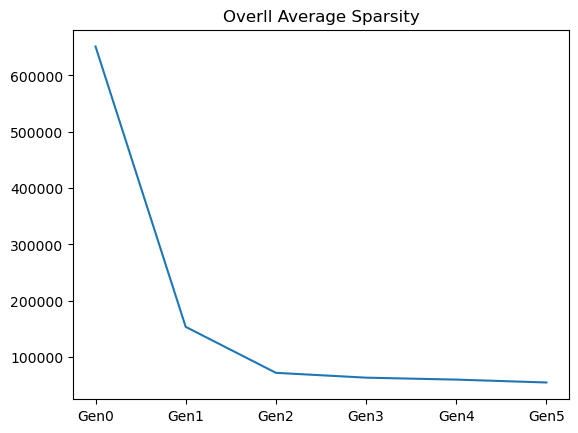

In [41]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity
ax.plot(x,y)
plt.title("Overll Average Sparsity")
plt.show()

In [42]:
# Percentage change across overall average
avg_gen_sparsity_list = avg_gen_sparsity.tolist()
avg_gen_sparsity_percentage_change = []
for i in range(1, len(avg_gen_sparsity_list)):
    avg_gen_sparsity_percentage_change.append((avg_gen_sparsity_list[i] - avg_gen_sparsity_list[i-1]) / avg_gen_sparsity_list[i-1] * 100)
avg_gen_sparsity_percentage_change

[-76.37673544967278,
 -53.01641116096819,
 -11.900723208522471,
 -5.414241036164424,
 -8.448548712910224]

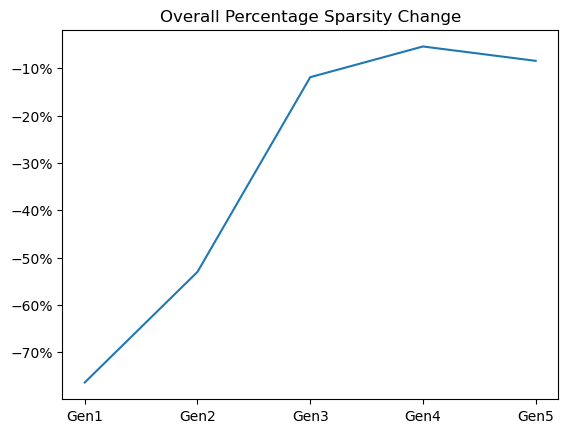

In [43]:
fig, ax = plt.subplots()
x = [1, 2, 3, 4, 5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = avg_gen_sparsity_percentage_change
ax.plot(x,y)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.title("Overall Percentage Sparsity Change")
plt.show()

In [44]:
# Averaging across all maps, is in order of the maps in the maps objecti
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

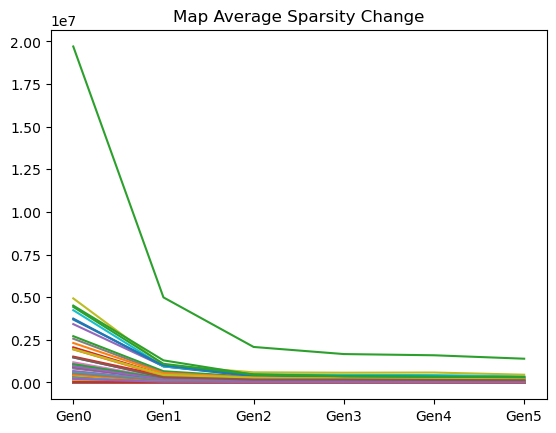

In [45]:
fig, ax = plt.subplots()
x = [0, 1, 2, 3, 4, 5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)
y = np.array(avg_map_sparsity).T
ax.plot(x,y)
plt.title("Map Average Sparsity Change")
plt.show()

In [46]:
# show the sparisty distrabution across all maps for each generation 
avg_gen0_sparsity = []
avg_gen1_sparsity = []
avg_gen2_sparsity = []
avg_gen3_sparsity = []
avg_gen4_sparsity = []
avg_gen5_sparsity = []
for map_inst in avg_map_sparsity:
    avg_gen0_sparsity.append(map_inst["gen0-sparsity"])
    avg_gen1_sparsity.append(map_inst["gen1-sparsity"])
    avg_gen2_sparsity.append(map_inst["gen2-sparsity"])
    avg_gen3_sparsity.append(map_inst["gen3-sparsity"])
    avg_gen4_sparsity.append(map_inst["gen4-sparsity"])
    avg_gen5_sparsity.append(map_inst["gen5-sparsity"])

In [47]:
# want a list representing generations, of maps, key = map-id, value = vg sparsity

In [48]:
avg_gen0_sparsity
print(min(avg_gen0_sparsity))
print(max(avg_gen0_sparsity))

678.6242866666666
19703859.653333332


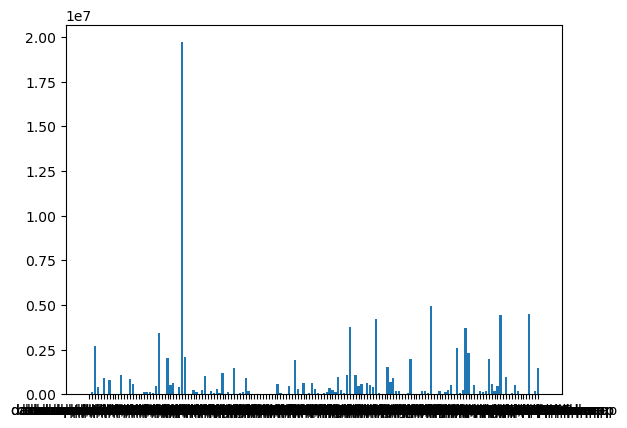

In [49]:
empty_array = [1]*156
plt.bar(maps, avg_gen0_sparsity)
plt.show()

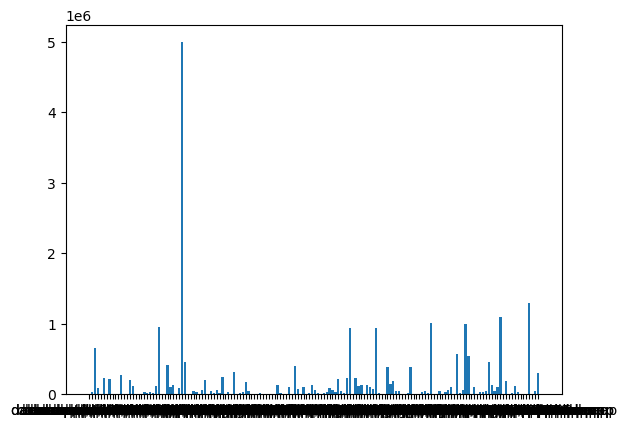

In [50]:
plt.bar(maps, avg_gen1_sparsity)
plt.show()

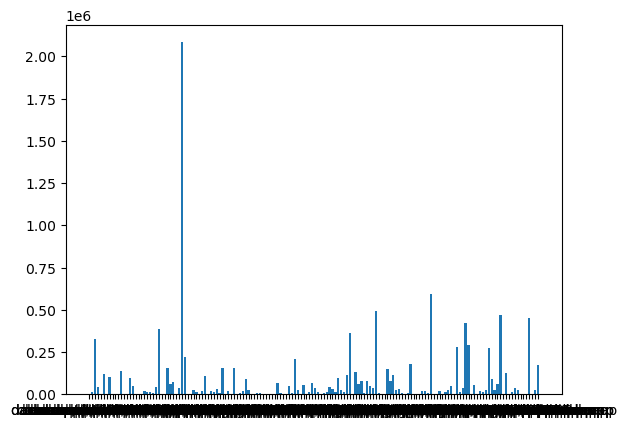

In [51]:
plt.bar(maps, avg_gen2_sparsity)
plt.show()

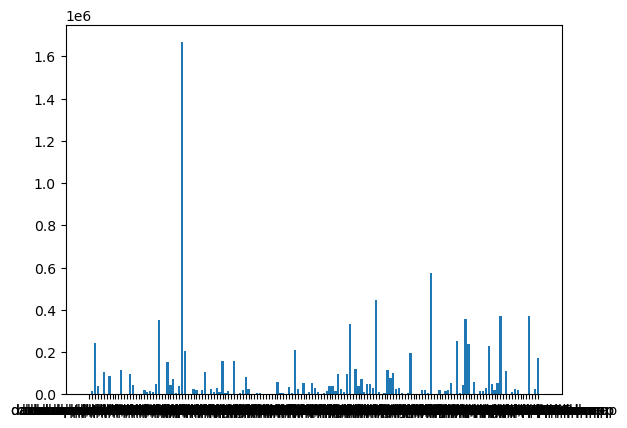

In [52]:
plt.bar(maps, avg_gen3_sparsity)
plt.show()

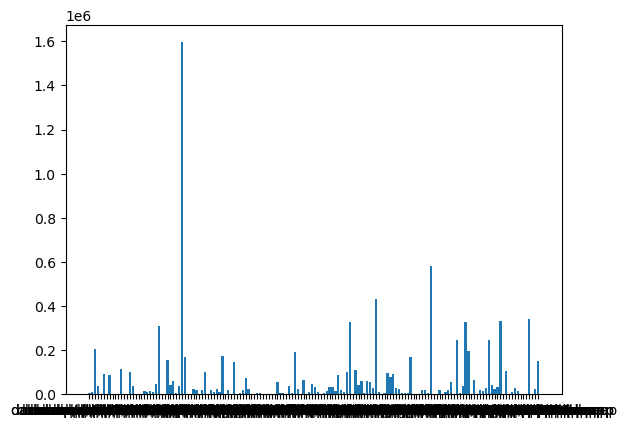

In [53]:
plt.bar(maps, avg_gen4_sparsity)
plt.show()

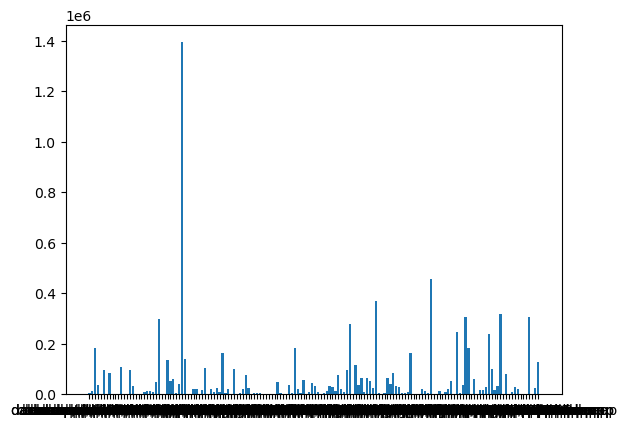

In [54]:
plt.bar(maps, avg_gen5_sparsity)
plt.show()

In [55]:
# 
# Hypervolume
#

In [56]:
# front must be a 2d matrix (?)
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

In [57]:
def map_avg_HV(df):
    map_avg_HV = []
    maps = df['map-id'].unique()
    for MAP in maps:
        map_df = df[df['map-id'] == MAP]
        fronts = map_df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
        HVs = []
        for index, row in fronts:
            HVs.append(front_hv(row))
        HVs = np.array(HVs).T
        avg_HVs = []
        for gen in HVs:
            avg_HVs.append(gen.mean())
        avg_HVs = np.array(avg_HVs).T
        map_avg_HV.append(avg_HVs)
    return map_avg_HV

In [58]:
# calculate the overall average generational hypervolume
def overall_gen_HV(df):
    gen_HV = []
    fronts = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    # iterate through all rows and record the generations fronts hypervolume
    for index, row in fronts.iterrows():
        row_HV = []
        for front in row:
            row_HV.append(front_hv(front))
            
        gen_HV.append(row_HV)
            
    gen_HV = np.array(gen_HV).T
    avg_gen_HV = []
    for gen in gen_HV:
        avg_gen_HV.append(gen.mean())

    return avg_gen_HV

In [59]:
overall_avg_HV = overall_gen_HV(df)
overall_avg_HV = np.array(overall_avg_HV).T
overall_avg_HV

----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------------------- 
 no good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


array([9.16266816e+15, 5.67337354e+15, 5.24161320e+15, 4.96303380e+15,
       4.31846951e+15, 4.12254693e+15])

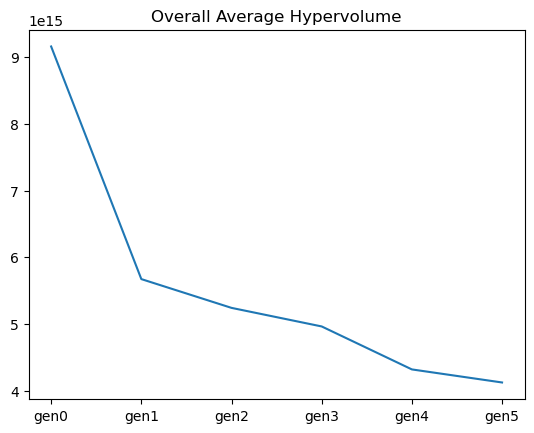

In [61]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = overall_avg_HV
ax.plot(x,y)
# add a y axis line for the A*Pex line
plt.title("Overall Average Hypervolume")
plt.show()

In [62]:
overall_avg_HV_percentage_change = []
for i in range(1, len(overall_avg_HV)):
    overall_avg_HV_percentage_change.append((overall_avg_HV[i] - overall_avg_HV[i-1]) / overall_avg_HV[i-1] * 100)
overall_avg_HV_percentage_change

[-38.0816434450813,
 -7.61029287157428,
 -5.314764563259695,
 -12.987304159634833,
 -4.536852122350781]

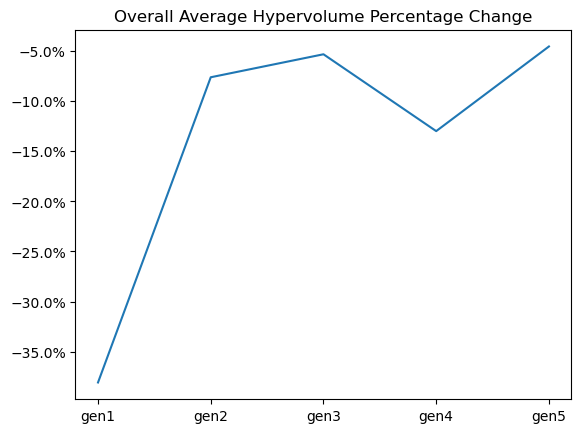

In [63]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = [ "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(overall_avg_HV_percentage_change).T
ax.yaxis.set_major_formatter(PercentFormatter())
ax.plot(x,y)
plt.title("Overall Average Hypervolume Percentage Change")
plt.show()

In [64]:
#
# d-score
#

In [65]:
avg_map_sparsity = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_map_sparsity.append(map_df.mean(axis=0))

In [66]:
#
# Represneative path
#

In [70]:
df.head()

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-d-score,gen0-norm-d-score,gen0-sparsity,...,gen4-time,gen5-front,gen5-norm-front,gen5-d-score,gen5-norm-d-score,gen5-sparsity,gen5-winner,gen5-winner-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,range,weighted_conscious,"[[50, 50.414, 564, 126, 175.5], [50, 50.414, 5...","[[0, 0, 0.922892, 1, 0], [0, 0, 0.922892, 1, 0...","[1.36078, 1.85242, 1.0067, 1.36078]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,211,"[[50, 52.07, 501, 75, 177.5], [50, 52.07, 501,...","[[0, 5.22765e-16, 0.738155, 0, 0], [0, 5.22765...","[1.36078, 1.85242, 1.0067, 1.36078]","[0.738155, 1, 0.769835, 1.02877, 0.769835, 1.5...",7920.670,"[50, 52.07, 501, 75, 177.5]",0.738155,8.596742e-322,208
1,dao-map/ost004d.map,3111,3309,range,weighted_conscious,"[[54, 54.828, 590, 140.5, 242], [54, 54.828, 5...","[[0, 0, 1, 0.868613, 0.764706], [0, 0, 1, 0.86...","[1.52947, 1.9492, 1.15171, 1.40308]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,294,"[[54, 66.42, 247, 81, 228], [54, 66.42, 247, 8...","[[0, 0.631579, 0.0340136, 0, 0.368421], [0, 0....","[1.52947, 1.9492, 1.15171, 1.40308]","[0.731972, 0.716844, 0.712028, 1.00452, 1.4142...",11872.100,"[54, 66.42, 247, 81, 228]",0.731972,2.198592e-321,290
2,dao-map/ost004d.map,3366,4402,range,weighted_conscious,"[[23, 30.038, 243, 60, 114], [23, 30.038, 243,...","[[0, 0, 1, 1, 0.040404], [0, 0, 1, 1, 0.040404...","[1.41479, 1.89335, 0.987101, 1.3775]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,142,"[[23, 30.038, 242, 34.5, 112], [23, 30.038, 24...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0.333333, ...","[1.41479, 1.89335, 0.987101, 1.3775]","[1, 0.737577, 1.04608, 1.10848, 1.22661, 1.741...",802.459,"[23, 30.038, 242, 34.5, 112]",1.000000,2.272702e-321,141
3,dao-map/ost004d.map,4151,4286,range,weighted_conscious,"[[28, 32.968, 324, 59, 133], [28, 32.968, 324,...","[[0, 0, 1, 0.507463, 0.193548], [0, 0, 1, 0.50...","[1.13797, 2, 0.858644, 0.918202]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,151,"[[28, 36.28, 206, 42, 124.5], [28, 36.28, 206,...","[[0, 0.679431, 0.351562, 0, 0.0769231], [0, 0....","[1.13797, 2, 0.858644, 0.918202]","[0.768856, 1, 1.71185, 1, 2]",2051.390,"[28, 33.796, 289, 42, 124]",1.000000,4.836903e-321,146
4,dao-map/ost004d.map,3615,497,range,weighted_conscious,"[[45, 62.802, 473, 84.5, 179], [45, 62.802, 47...","[[0, 0, 0.848276, 0.0752688, 0], [0, 0, 0.8482...","[0.851609, 2, 1.00141, 0.851609]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,317,"[[46, 63.388, 423, 77.5, 183], [46, 63.388, 42...","[[0.125, 0.0923707, 0.704142, 0, 0.125], [0.12...","[0.851609, 2, 1.00141, 0.851609]","[0.731846, 0.670049, 1.06571, 0.758091, 1.3018...",612.859,"[46, 63.388, 423, 77.5, 183]",0.731846,0.000000e+00,317


In [73]:
#overall average
norm_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
rep_df = df.filter(["gen0-raw-winner", "gen1-raw-winner", "gen2-raw-winner", "gen3-raw-winner", "gen4-raw-winner", "gen5-raw-winner"])

In [447]:
norm_df

,gen0-norm-winner,gen1-norm-winner,gen2-norm-winner,gen3-norm-winner,gen4-norm-winner,gen5-norm-winner
0,"[0, 0, 0.922892, 1, 0]","[0, 0.0694806, 0.4, 0.833333, 0.0338983]","[0, 0.0871304, 1, 0, 0.0465116]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
1,"[0, 0.115385, 0.924933, 0, 0.676471]","[0, 0.538462, 0.080429, 0, 0.352941]","[0, 0.478261, 0.0597015, 0, 0.521739]","[0, 0.611111, 0.0289855, 0, 0.388889]","[0, 0.611111, 0.0289855, 0, 0.388889]","[0, 0.611111, 0.0307692, 0, 0.388889]"
2,"[0, 0, 0.947368, 1, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
3,"[0, 0.0595769, 0.853261, 0, 0.0752688]","[0, 0.238308, 0.358696, 0, 0.0107527]","[0, 0.184657, 0.785276, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
4,"[0, 0, 0.848276, 0.0752688, 0]","[0, 0, 0.848276, 0.0752688, 0]","[0, 0, 0.837638, 0.175, 0]","[0.125, 0.0923707, 0.558685, 0, 0.125]","[0, 0, 0.793427, 0.368421, 0]","[0, 0, 0.799087, 0.341463, 0]"
...,...,...,...,...,...,...
2335,"[0.047619, 0, 0.881535, 0.619753, 0.375367]","[0.047619, 0.0715912, 0.959233, 0.0111111, 0.0...","[0.230769, 0.121495, 0.503419, 0.0215827, 0.06...","[0, 0.0771357, 0.955474, 0, 0.0653595]","[0, 0, 1, 0, 0]","[0, 0, 1, 0, 0]"
2336,"[0, 0, 0.838819, 0.579892, 0]","[0, 0, 0.87423, 0.579892, 0]","[0.0833333, 0.0257424, 0.703364, 0.00928793, 0...","[0.0714286, 0.0236634, 0.695035, 0, 0.12381]","[0, 0, 0.844985, 1, 0]","[0, 0, 0.844985, 0.981595, 0]"
2337,"[0.0148148, 0.109221, 0.98865, 0, 0.298969]","[0.037037, 0.0409141, 0.832736, 0.00657895, 0....","[0.0697674, 0.034448, 0.710345, 0.011335, 0.05...","[0.09375, 0.0346664, 0.697049, 0.011335, 0.068...","[0.0909091, 0.0344694, 0.694949, 0.011335, 0.0...","[0.09375, 0.0346664, 0.694343, 0.011335, 0.068..."
2338,"[0, 0.11478, 0.916096, 0, 0.466667]","[0.0192308, 0.112051, 0.460616, 0.00548446, 0....","[0, 0.0944074, 0.950189, 0.05, 0.0540541]","[0, 0, 0.988228, 0.179487, 0]","[0.111111, 0.0184451, 0.838033, 0, 0.0425532]","[0, 0, 0.988197, 0.186667, 0]"


In [373]:
#input is a column of 1 x n lists. returns a 1 x n list of the column wise average
def column_list_average(column):
    gen_costs_matrix = column.tolist()
    gen_cost_df = pd.DataFrame(gen_costs_matrix, columns = ["C1", "C2", "C3", "C4", "C5"])
    gen_cost_list = gen_cost_df.mean(axis=0).tolist()
    return gen_cost_list

In [450]:
average_gen_rep_path = []
for gen in norm_df:
    average_gen_rep_path.append(column_list_average(norm_df[gen]))
average_gen_rep_path

[[0.005386200465811966,
  0.06043007052991454,
  0.8616901171367521,
  0.2876062945726495,
  0.19416095488461538],
 [0.011481724863247863,
  0.13601768135042736,
  0.5625929545299145,
  0.04983846640940171,
  0.08743885867094016],
 [0.04266164346153846,
  0.21822711746581205,
  0.5433867113333334,
  0.0640207712863248,
  0.1294288160854701],
 [0.026274077222222223,
  0.17540546248717953,
  0.5978208901709402,
  0.09183616582051281,
  0.12162600335470085],
 [0.0249604773974359,
  0.1550780691452992,
  0.6238837402564102,
  0.09144452953846154,
  0.1120210177051282],
 [0.02492224303846154,
  0.14766592158119662,
  0.6272601477350428,
  0.10055503122649571,
  0.10628855365811965]]

In [451]:
average_gen_rep_path[0]

[0.005386200465811966,
 0.06043007052991454,
 0.8616901171367521,
 0.2876062945726495,
 0.19416095488461538]

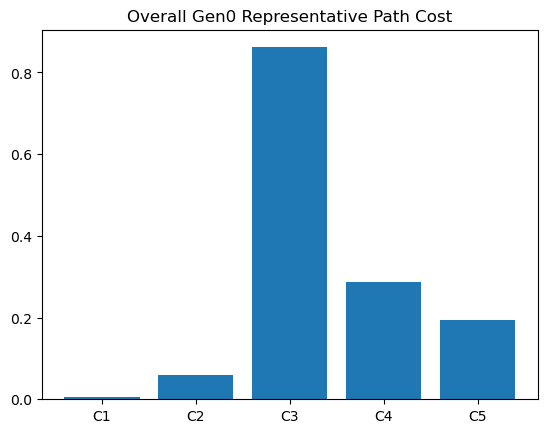

[0.005386200465811966, 0.06043007052991454, 0.8616901171367521, 0.2876062945726495, 0.19416095488461538]


In [452]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[0])
plt.title("Overall Gen0 Representative Path Cost")
plt.show()
print(average_gen_rep_path[0])

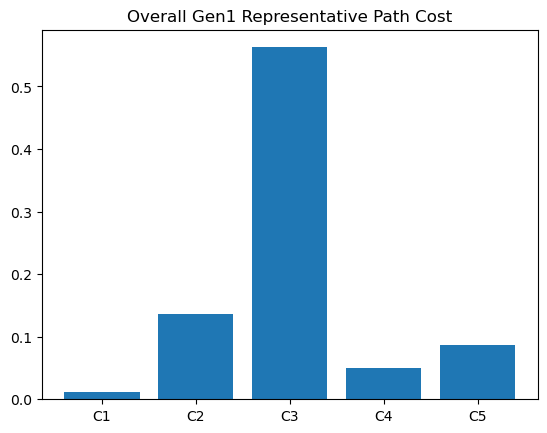

[0.011481724863247863, 0.13601768135042736, 0.5625929545299145, 0.04983846640940171, 0.08743885867094016]


In [453]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[1])
plt.title("Overall Gen1 Representative Path Cost")
plt.show()
print(average_gen_rep_path[1])

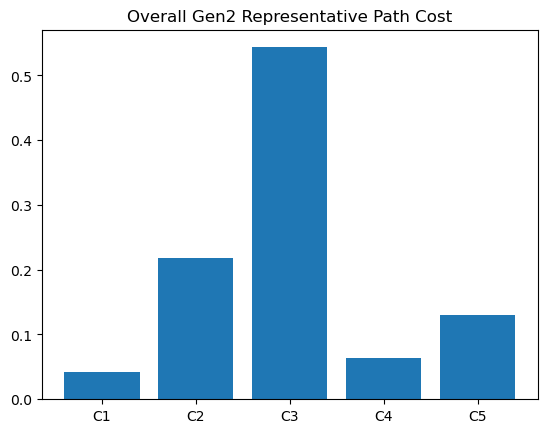

[0.04266164346153846, 0.21822711746581205, 0.5433867113333334, 0.0640207712863248, 0.1294288160854701]


In [454]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[2])
plt.title("Overall Gen2 Representative Path Cost")
plt.show()
print(average_gen_rep_path[2])

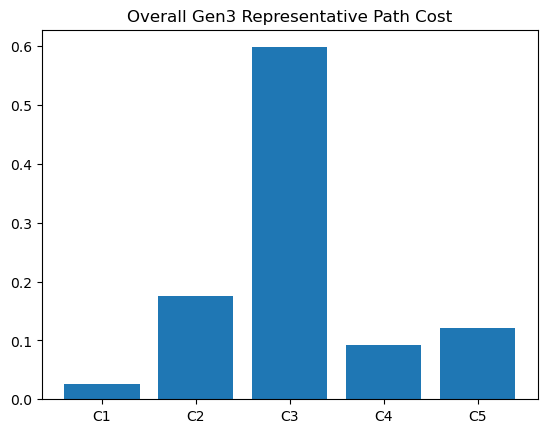

[0.026274077222222223, 0.17540546248717953, 0.5978208901709402, 0.09183616582051281, 0.12162600335470085]


In [455]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[3])
plt.title("Overall Gen3 Representative Path Cost")
plt.show()
print(average_gen_rep_path[3])

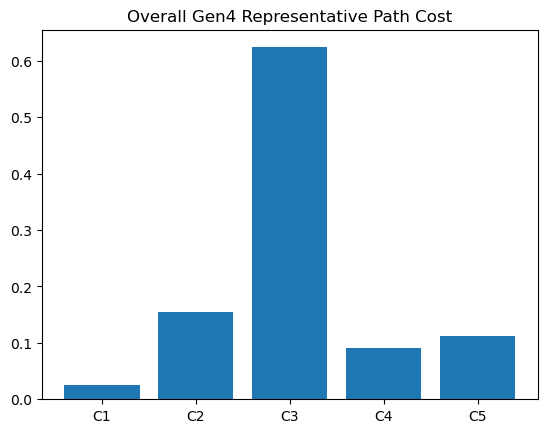

[0.0249604773974359, 0.1550780691452992, 0.6238837402564102, 0.09144452953846154, 0.1120210177051282]


In [456]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[4])
plt.title("Overall Gen4 Representative Path Cost")
plt.show()
print(average_gen_rep_path[4])

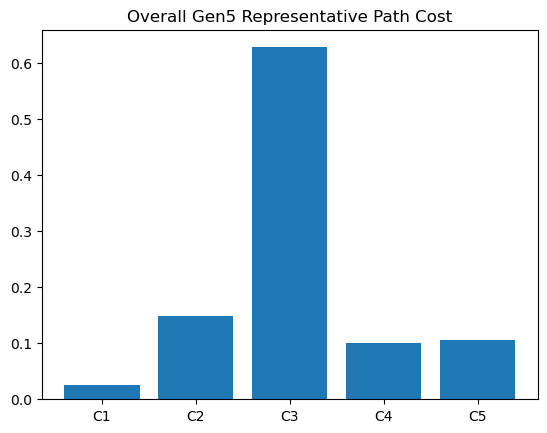

[0.02492224303846154, 0.14766592158119662, 0.6272601477350428, 0.10055503122649571, 0.10628855365811965]


In [457]:
plt.bar(["C1", "C2", "C3", "C4", "C5"], average_gen_rep_path[5])
plt.title("Overall Gen5 Representative Path Cost")
plt.show()
print(average_gen_rep_path[5])

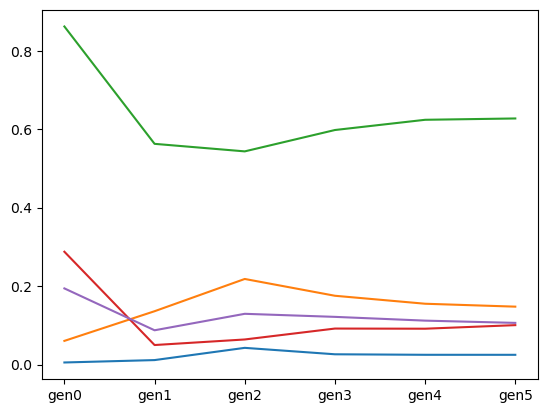

In [458]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = average_gen_rep_path
ax.plot(x,y)
plt.title("")
plt.show()

In [79]:
#problem: not all instnaces have the same size!
avg_map_d_score = []
avg_map_norm_d_score = []
for MAP in maps:
    map_df = df[df["map-id"] == MAP]
    raw_df = map_df.filter(["gen0-raw-d-score", "gen1-raw-d-score", "gen2-raw-d-score", "gen3-raw-d-score", "gen4-raw-d-score", "gen5-raw-d-score"])
    norm_df = map_df.filter(["gen0-norm-d-score", "gen1-norm-d-score", "gen2-norm-d-score", "gen3-norm-d-score", "gen4-norm-d-score", "gen5-norm-d-score"])
    for index, row in raw_df.iterrows():
        map_inst = []
        for gen in row:
            map_inst.append(np.array(gen).mean())
#            print(gen)
#            print(np.array(gen).mean())
#            print("-")
#        print("----")
        avg_map_d_score.append(np.array(map_inst).mean())


    break

/var/folders/sz/10t46yj57l72d9m15rn_xnt80000gn/T/ipykernel_52248/4271736686.py:16: RuntimeWarning: Mean of empty slice.
  avg_map_d_score.append(np.array(map_inst).mean())
/Users/magi/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#
# Run time
#

In [434]:
run_times = []
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
for gen in time_df:
    run_times.append(time_df[gen].to_list())

In [77]:
time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
gen_time_avg = time_df.mean(axis=0)
gen_time_avg

gen0-time    1692.626923
gen1-time     657.194872
gen2-time    1675.536752
gen3-time     805.221368
gen4-time    2791.697009
gen5-time    1540.773932
dtype: float64

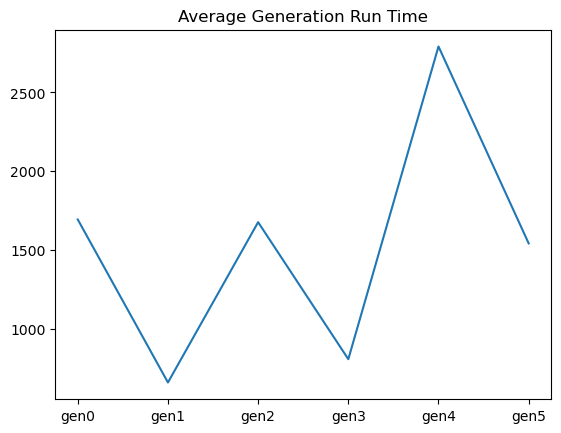

In [78]:
fig, ax = plt.subplots()
x = [0, 1,2,3,4,5]
x_ticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"]
plt.xticks(x, x_ticks)
y = np.array(gen_time_avg).T
ax.plot(x,y)
plt.title("Average Generation Run Time")
plt.show()